In [1]:
#!/usr/bin/python

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

%matplotlib inline


In [121]:
#import data

long_df=pd.read_csv('data/long_df.csv')

gut_df=pd.read_csv('../gutproject/long_df_gut.csv') #tissue data!
#correlate between Sx
Sx_df=pd.read_csv('data/long_df_Sx.csv')

celltypes=['TN', 'TSCM','TCM', 'TTM','TEM'] #cell type names

cellnames=['$\mathrm{T_N}$','$\mathrm{T_{SCM}}$','$\mathrm{T_{CM}}$','$\mathrm{T_{TTM}}$','$\mathrm{T_{EM}}$']
cellcolors=['deepskyblue','green','gold','navy','crimson']
dtype_l=['DNApmsub','DNApmCD4','RNApmCD4','iDNApmL','caRNApmL']


In [3]:
long_df.head()

,pat_id,celltype,measurement_num,celltype_num,DNApmCD4,RNApmCD4,DNApmsub,preART_months,time_postART_years,Age_years,cellular_hl_days,poolsize_cells/mLblood,GiniInd,TRECs,pat_id_num,iDNApmL,caRNApmL
0,3693,TN,1,1,2.25,0.36,9.12,0.9,1.2,46.0,784.63,210.39,0.17,2870.6,3693_1,473.3775,75.7404
1,3693,TN,2,1,10.86,0.39,71.46,0.9,2.7,46.0,784.63,98.45,0.17,2870.6,3693_2,1069.1670,38.3955
2,3693,TN,3,1,9.52,1.27,57.12,0.9,4.0,46.0,784.63,124.12,0.17,2870.6,3693_3,1181.6224,157.6324
3,3693,TSCM,1,2,0.04,0.61,4.85,0.9,1.2,46.0,208.09,9.03,NaN,2870.6,3693_1,0.3612,5.5083
4,3693,TSCM,2,2,1.35,0.79,167.30,0.9,2.7,46.0,208.09,5.21,NaN,2870.6,3693_2,7.0335,4.1159


In [4]:
#make a normalized df which is deviation from mean within individuals
for dd in dtype_l:
    avg_l=[]
    for pid in long_df['pat_id'].unique():
        for ct in long_df['celltype'].unique():
            tdf=long_df[(long_df['pat_id']==pid)&(long_df['celltype']==ct)]['DNApmCD4']
            for i in range(3):
                avg_l.append(tdf.mean())
            
    long_df[dd+'_normed']=long_df[dd]/np.array(avg_l)

In [5]:
long_df.columns

Index(['pat_id', 'celltype', 'measurement_num', 'celltype_num', 'DNApmCD4',
       'RNApmCD4', 'DNApmsub', 'preART_months', 'time_postART_years',
       'Age_years', 'cellular_hl_days', 'poolsize_cells/mLblood', 'GiniInd',
       'TRECs', 'pat_id_num', 'iDNApmL', 'caRNApmL', 'DNApmsub_normed',
       'DNApmCD4_normed', 'RNApmCD4_normed', 'iDNApmL_normed',
       'caRNApmL_normed'],
      dtype='object')

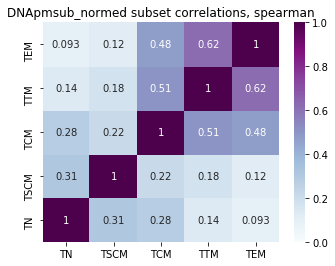

In [7]:
#look at correlations
corr_type='spearman'

dd='DNApmsub_normed'
tdf = long_df.pivot(index='pat_id_num',columns='celltype',values=dd).dropna()
corr_mat=tdf.corr(method=corr_type)
corr_mat=corr_mat.loc[celltypes[::-1],celltypes]

#plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr_mat, annot=True, vmin=0,vmax=1,cmap='BuPu')
#sns.heatmap(corr_mat, annot=True, vmin=-1,vmax=1,cmap='seismic')
titz=dd+ ' subset correlations, ' + corr_type
plt.title(titz)
plt.tight_layout()
plt.xlabel('')
plt.ylabel('')

plt.savefig('figures/corrmats/subsets_'+dd+corr_type+'.pdf',dpi=600)

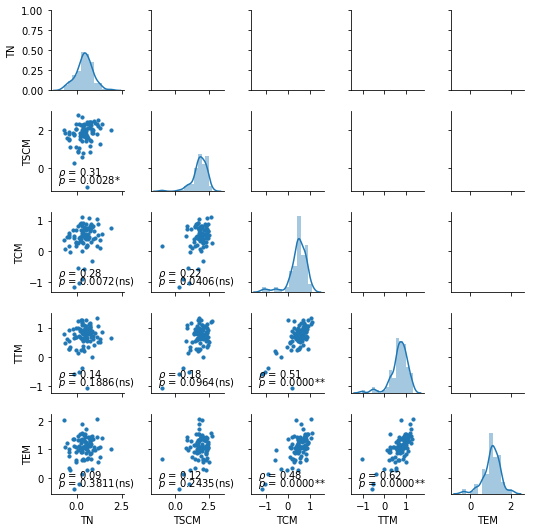

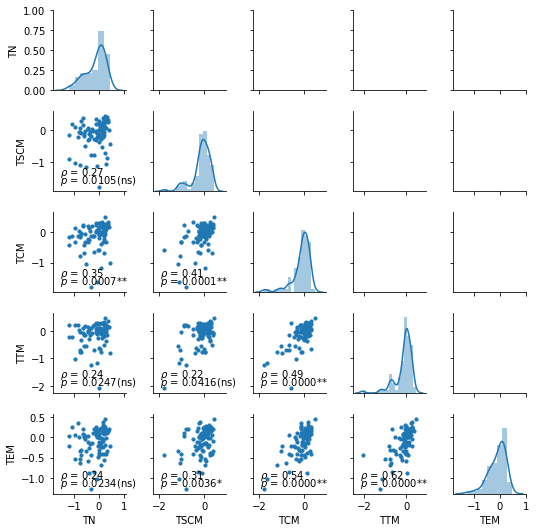

In [48]:
#pairplots intead of heatmap, shows raw correlations for visual
#also shows pvalu

def corrfunc(x, y, **kws):
    r,p = st.spearmanr(x, y)
    ax = plt.gca()
    ax.annotate(r'$\rho$ = {:.2f}'.format(r), xy=(.1, .2), xycoords=ax.transAxes)
    if p<0.001:
        ax.annotate(r'$p$ = {:.4f}**'.format(p), xy=(.1, .1), xycoords=ax.transAxes)
    elif p<0.005:
        ax.annotate(r'$p$ = {:.4f}*'.format(p), xy=(.1, .1), xycoords=ax.transAxes)
    else:
        ax.annotate(r'$p$ = {:.4f}(ns)'.format(p), xy=(.1, .1), xycoords=ax.transAxes)
    
tdf = long_df.pivot(index='pat_id_num',columns='celltype',values='DNApmsub_normed').dropna()
g = sns.PairGrid(np.log10(tdf[celltypes]), palette='viridis',size=1.5)
g.map_lower(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=True)
g.map_lower(corrfunc)
plt.savefig('figures/corrmats/pairplot_subfrac.pdf',dpi=600)

tdf = long_df.pivot(index='pat_id_num',columns='celltype',values='DNApmCD4_normed').dropna()
g = sns.PairGrid(np.log10(tdf[celltypes]), palette='viridis',size=1.5)
g.map_lower(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=True)
g.map_lower(corrfunc)
plt.savefig('figures/corrmats/pairplot_DNA.pdf',dpi=600)


In [10]:
#list of colors
clz=[]
for i in range(len(long_df)):
    clz.append(cellcolors[long_df['celltype_num'].iloc[i]-1])
                   

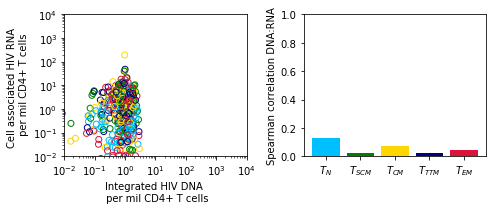

In [11]:
#RNA vs DNA
plt.figure(figsize=(7,3))
plt.subplot(121)
plt.scatter(long_df['DNApmCD4_normed'],long_df['RNApmCD4_normed'],edgecolors=clz,facecolors='none')
plt.loglog()
plt.xlim([1e-2,1e4])
plt.ylim([1e-2,1e4])
plt.xlabel('Integrated HIV DNA \n per mil CD4+ T cells')
plt.ylabel('Cell associated HIV RNA \n per mil CD4+ T cells')
plt.subplot(122)
plt.bar(np.arange(len(RNADNA)),RNADNA,color=cellcolors)
plt.ylim([0,1])
plt.xticks(np.arange(len(RNADNA)),cellnames)
plt.ylabel('Spearman correlation DNA:RNA')

plt.tight_layout()
plt.savefig('figures/corrmats/RNAvsDNA.pdf',dpi=600)

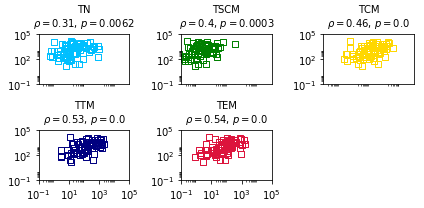

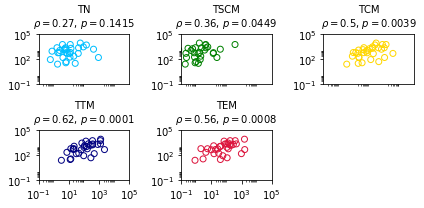

In [157]:
#natural data -- spearman correlation between tissue and blood
#shows across people levels across tissues are correlated

for gtype in ['Rectal CD4 T cells','Ileal CD4 T cells']:
    plt.figure(figsize=(6,3))
    for ic,ct in enumerate(celltypes):
        plt.subplot(231+ic)
        tdf=gut_df[gut_df['celltype']==gtype].merge(long_df[long_df['celltype']==ct][['pat_id_num','DNApmCD4']],
                                                    how='left',on='pat_id_num').dropna()
        tdf[tdf['DNA']==0]=1e-3
        xx,yy=tdf['DNApmCD4'],tdf['DNA']
        mz='o'
        if 'Rectal' in gtype:
            mz='s'
        plt.scatter(xx,yy,marker=mz,edgecolors=cellcolors[ic],facecolors='none')
        plt.loglog()
        plt.xlim([0.1,1e5])
        plt.ylim([0.1,1e5])
        rho,pval=st.spearmanr(xx,yy)
        if ic<3:
            plt.xticks([])

        plt.title(ct+'\n'+r'$\rho=$'+str(round(rho,2))+r', $p=$'+str(round(pval,4)),fontsize=10)
    plt.tight_layout()
    plt.savefig('figures/corrmats/'+gtype[:5]+'.pdf',dpi=600)

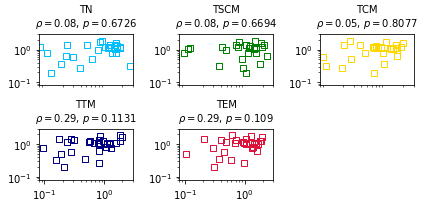

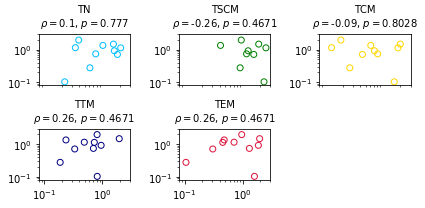

In [155]:
#normalized data -- spearman correlation between tissue and blood
#shows within people levels are not really correlated, making trafficking seem less obvious

for gtype in ['Rectal CD4 T cells','Ileal CD4 T cells']:
    plt.figure(figsize=(6,3))
    for ic,ct in enumerate(celltypes):
        plt.subplot(231+ic)
        tdf=gut_df[gut_df['celltype']==gtype].merge(long_df[long_df['celltype']==ct][['pat_id_num','DNApmCD4']],
                                                    how='left',on='pat_id_num').dropna()
        tdf[tdf['DNA']==0]=1e-3
        xx,yy=tdf['DNApmCD4'],tdf['DNA']

        #maybe don't need to do within personal normalization for this because values need to correlate across people??
        xxl=[]; 
        yyl=[]
        for pid in tdf['pat_id'].unique():
            tdf2=tdf[tdf['pat_id']==pid]
            xx2,yy2=tdf2['DNApmCD4']/np.mean(tdf2['DNApmCD4']),tdf2['DNA']/np.mean(tdf2['DNA'])
            if len(xx2)>1:
                xxl.append(xx2.iloc[0])
                yyl.append(yy2.iloc[0])
        mz='o'
        if 'Rectal' in gtype:
            mz='s'
        plt.scatter(xxl,yyl,marker=mz,edgecolors=cellcolors[ic],facecolors='none')
        plt.loglog()
        plt.xlim([0.08,3])
        plt.ylim([0.08,3])
        rho,pval=st.spearmanr(xxl,yyl)
        if ic<3:
            plt.xticks([])

        plt.title(ct+'\n'+r'$\rho=$'+str(round(rho,2))+r', $p=$'+str(round(pval,4)),fontsize=10)
        plt.tight_layout()
    plt.savefig('figures/corrmats/'+gtype[:5]+'_norm.pdf',dpi=600)

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Applications/anaconda/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:

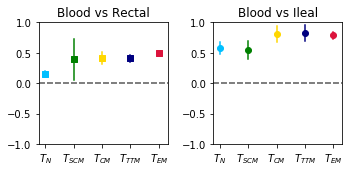

In [159]:
#MEM without norm
meml=[]
for gtype in ['Rectal CD4 T cells','Ileal CD4 T cells']:
    for ic,ct in enumerate(celltypes):
        memdf=pd.DataFrame()
        tdf=gut_df[gut_df['celltype']==gtype].merge(long_df[long_df['celltype']==ct][['pat_id_num','DNApmCD4']],
                                                    how='left',on='pat_id_num').dropna()
       
        tdf[tdf['DNA']==0]=1e-3

        xxl=[]; 
        yyl=[]
        pl=[]
        for pid in tdf['pat_id'].unique():
            tdf2=tdf[tdf['pat_id']==pid]
            xx2,yy2=tdf2['DNApmCD4'],tdf2['DNA']
            #xx2,yy2=tdf2['DNApmCD4']/np.mean(tdf2['DNApmCD4']),tdf2['DNA']/np.mean(tdf2['DNA'])
            xxl.append(xx2.iloc[0])
            yyl.append(yy2.iloc[0])
            pl.append(pid)

        memdf['obs_blood']=np.log10(xxl)
        memdf['obs_tissue']=np.log10(yyl)
        memdf['pid']=pl
        
        memdf.dropna()
        
        #run MEM
        md = smf.mixedlm('obs_blood ~ obs_tissue', memdf, groups=memdf['pid'])
        mdf = md.fit()

        meml.append([gtype,ct,mdf.params[1],mdf.conf_int().iloc[1,0],mdf.conf_int().iloc[1,1]])

plt.figure(figsize=(5,2.5))
for im,mm in enumerate(meml):
    if im<5:
        plt.subplot(121)
        plt.scatter(im,mm[2],c=cellcolors[im],marker='s')
        plt.plot([im,im],[mm[3],mm[4]],color=cellcolors[im])
        plt.xticks(range(5),cellnames)
        plt.title('Blood vs Rectal')
        plt.ylim([-1,1])
        plt.axhline(0,ls='--',color='gray')
    else:
        plt.subplot(122)
        plt.scatter(im-5,mm[2],c=cellcolors[im-5],marker='o')
        plt.plot([im-5,im-5],[mm[3],mm[4]],color=cellcolors[im-5])
        plt.xticks(range(5),cellnames)
        plt.title('Blood vs Ileal')
        plt.ylim([-1,1])
        plt.axhline(0,ls='--',color='gray')
plt.tight_layout()
plt.savefig('figures/corrmats/mem.pdf',dpi=600)

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Applications/anaconda/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:

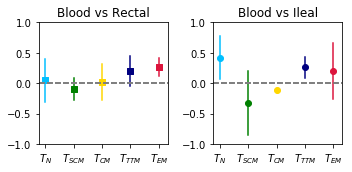

In [160]:
#MEM WITH norm
meml=[]
for gtype in ['Rectal CD4 T cells','Ileal CD4 T cells']:
    for ic,ct in enumerate(celltypes):
        memdf=pd.DataFrame()
        tdf=gut_df[gut_df['celltype']==gtype].merge(long_df[long_df['celltype']==ct][['pat_id_num','DNApmCD4']],
                                                    how='left',on='pat_id_num').dropna()
       
        tdf[tdf['DNA']==0]=1e-3

        xxl=[]; 
        yyl=[]
        pl=[]
        for pid in tdf['pat_id'].unique():
            tdf2=tdf[tdf['pat_id']==pid]
            #xx2,yy2=tdf2['DNApmCD4'],tdf2['DNA']
            xx2,yy2=tdf2['DNApmCD4']/np.mean(tdf2['DNApmCD4']),tdf2['DNA']/np.mean(tdf2['DNA'])
            xxl.append(xx2.iloc[0])
            yyl.append(yy2.iloc[0])
            pl.append(pid)

        memdf['obs_blood']=np.log10(xxl)
        memdf['obs_tissue']=np.log10(yyl)
        memdf['pid']=pl
        
        memdf.dropna()
        
        #run MEM
        md = smf.mixedlm('obs_blood ~ obs_tissue', memdf, groups=memdf['pid'])
        mdf = md.fit()

        meml.append([gtype,ct,mdf.params[1],mdf.conf_int().iloc[1,0],mdf.conf_int().iloc[1,1]])

plt.figure(figsize=(5,2.5))
for im,mm in enumerate(meml):
    if im<5:
        plt.subplot(121)
        plt.scatter(im,mm[2],c=cellcolors[im],marker='s')
        plt.plot([im,im],[mm[3],mm[4]],color=cellcolors[im])
        plt.xticks(range(5),cellnames)
        plt.title('Blood vs Rectal')
        plt.ylim([-1,1])
        plt.axhline(0,ls='--',color='gray')
    else:
        plt.subplot(122)
        plt.scatter(im-5,mm[2],c=cellcolors[im-5],marker='o')
        plt.plot([im-5,im-5],[mm[3],mm[4]],color=cellcolors[im-5])
        plt.xticks(range(5),cellnames)
        plt.title('Blood vs Ileal')
        plt.ylim([-1,1])
        plt.axhline(0,ls='--',color='gray')
plt.tight_layout()
plt.savefig('figures/corrmats/mem_norm.pdf',dpi=600)